In [28]:
from ipwhois import IPWhois
from ipwhois.exceptions import IPDefinedError

def lookup(ip):
    try:
        ipwhois = IPWhois(ip)
        result = ipwhois.lookup_rdap()
        return result['asn_description']
    except:
        return None

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

col_names = ["TYPE", "SFLOW_AGENT_ADDRESS", "INPUT_PORT", "OUTPUT_PORT", "SRC_MAC",
    "DST_MAC", "ETHERNET_TYPE", "IN_VLAN", "OUT_VLAN", "SRC_IP", "DST_IP", "IP_PROTOCOL",
    "IP_TOS", "IP_TTL", "SRC_PORT", "DST_PORT", "TCP_FLAGS", "PACKET_SIZE", "IP_PACKET_SIZE",
    "SAMPLING_RATE", ""]

data = pd.read_csv(
    "./Data_3.csv", header=None, names=col_names)

n = len(data)
data.insert(0, "PAIRS", [(data["SRC_IP"][i], data["DST_IP"][i]) for i in range(n)])

# Top 5 Talkers
top_talkers = data["SRC_IP"].value_counts().iloc[:5]
print("Top 5 Talkers:")
print(top_talkers)
organisations = [lookup(ip) for ip in top_talkers.index]
print(organisations, "\n")

top_listeners = data["DST_IP"].value_counts().iloc[:5]
print("Top 5 Listeners:")
print(top_listeners, "\n")
organisations = [lookup(ip) for ip in top_listeners.index]
print(organisations, "\n")

top_ports = data["DST_PORT"].value_counts().iloc[:5]
print("Top 5 Destination Ports:")
print(top_ports, "\n")

total_packet_size = data["IP_PACKET_SIZE"].sum()
mb = 2**20
print("Total Packet Size:", total_packet_size, f"({total_packet_size*2048/mb}mb)\n")

protocols = data["IP_PROTOCOL"].value_counts()
vals = dict(zip(protocols.index, protocols.values))

print(vals)

print(f"TCP was called {vals[6]} times ({vals[6]*100//n}%)")
print(f"UDP was called {vals[17]} times ({vals[17]*100//n}%)\n")

Top 5 Talkers:
193.62.192.8     3041
155.69.160.32    2975
130.14.250.11    2604
14.139.196.58    2452
140.112.8.139    2056
Name: SRC_IP, dtype: int64
['JANET Jisc Services Limited, GB', 'NTU-AS-AP Nanyang Technological University, SG', 'NLM-GW, US', 'NKN-EDGE-NW NKN EDGE Network, IN', 'NTU-TW National Taiwan University, TW'] 

Top 5 Listeners:
103.37.198.100     3841
137.132.228.15     3715
202.21.159.244     2446
192.101.107.153    2368
103.21.126.2       2056
Name: DST_IP, dtype: int64 

['A-STAR-AS-AP A-STAR, SG', 'NUS-AS-AP NUS Information Technology, SG', 'REPUBLICPOLYTECHNIC-AS Republic Polytechnic. Multihoming AS Singapore, SG', 'ESNET-AS, US', 'IITB-IN Powai, IN'] 

Top 5 Destination Ports:
443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: DST_PORT, dtype: int64 

Total Packet Size: 64777822 (126519.18359375mb)

{6: 56064, 17: 9462, 50: 1698, 0: 1261, 47: 657, 41: 104, 1: 74, 381: 45, 58: 4, 103: 1}
TCP was called 56064 times (80%)
UDP was calle

Top 5 Communication Pairs:
(193.62.192.8, 137.132.228.15)      3041
(130.14.250.11, 103.37.198.100)     2599
(14.139.196.58, 192.101.107.153)    2368
(140.112.8.139, 103.21.126.2)       2056
(137.132.228.15, 193.62.192.8)      1910
Name: PAIRS, dtype: int64
[['JANET Jisc Services Limited, GB', 'NUS-AS-AP NUS Information Technology, SG'], ['NLM-GW, US', 'A-STAR-AS-AP A-STAR, SG'], ['NKN-EDGE-NW NKN EDGE Network, IN', 'ESNET-AS, US'], ['NTU-TW National Taiwan University, TW', 'IITB-IN Powai, IN'], ['NUS-AS-AP NUS Information Technology, SG', 'JANET Jisc Services Limited, GB']] 



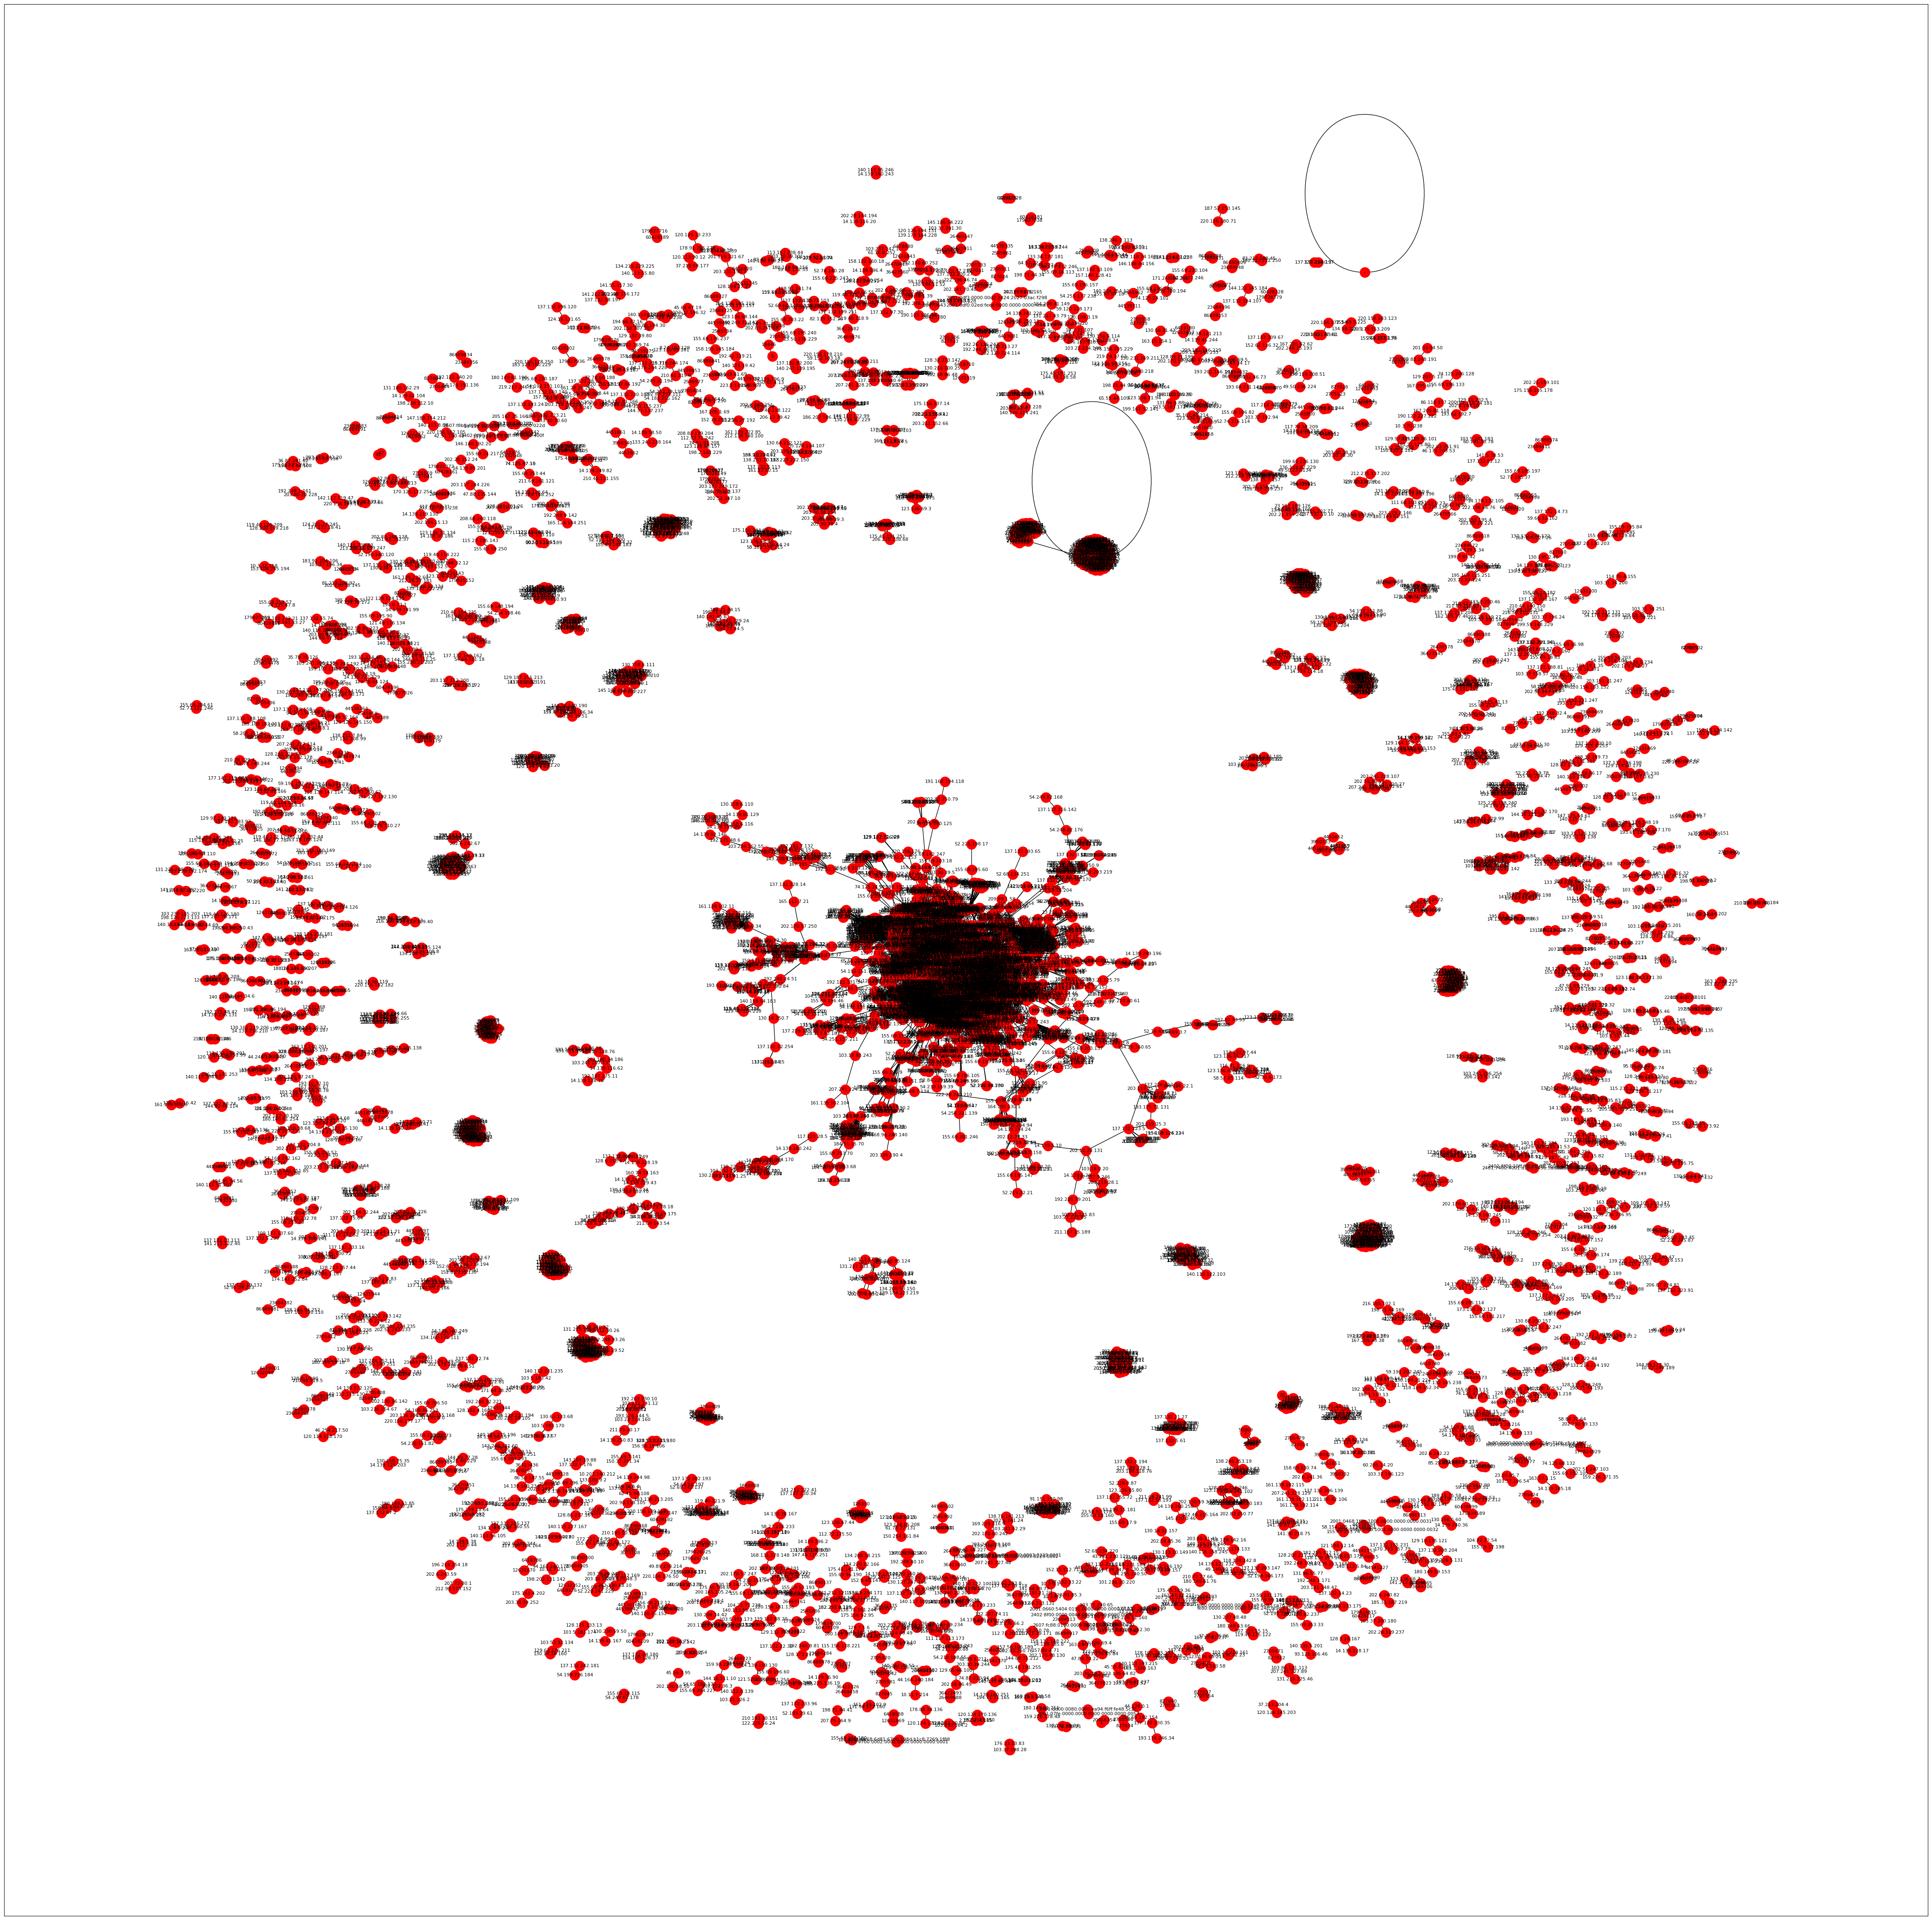

In [33]:
top_pairs = data["PAIRS"].value_counts().iloc[:5]
print("Top 5 Communication Pairs:")
print(top_pairs)
organisations = [[lookup(ip) for ip in pair] for pair in top_pairs.index]
print(organisations, "\n")

comm_dataset = data.groupby(["SRC_IP", "DST_IP"]).size().sort_values(ascending=False)

comm_dataframe = pd.DataFrame()
froms = []
tos = []
for (a, b), y in comm_dataset.items():
    froms.append(a)
    tos.append(b)

comm_dataframe["from"] = froms
comm_dataframe["to"] = tos

G = nx.from_pandas_edgelist(comm_dataframe, "from", "to")

plt.figure(figsize=(60, 60))
gp = nx.spring_layout(G)
nx.draw_networkx_nodes(G, gp, node_color="red")
nx.draw_networkx_edges(G, gp)
nx.draw_networkx_labels(G, gp, font_size=8)

plt.show()
